<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Acquire-Store-df-Using-Acquire-Function" data-toc-modified-id="Acquire-Store-df-Using-Acquire-Function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Acquire Store df Using Acquire Function</a></span><ul class="toc-item"><li><span><a href="#1-3-Exercises-with-Store-df" data-toc-modified-id="1-3-Exercises-with-Store-df-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>1-3 Exercises with Store df</a></span></li><li><span><a href="#4.-Date-Parts" data-toc-modified-id="4.-Date-Parts-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>4. Date Parts</a></span></li><li><span><a href="#5.-Create-New-Calculated-Column-Using-.assign()" data-toc-modified-id="5.-Create-New-Calculated-Column-Using-.assign()-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>5. Create New Calculated Column Using .assign()</a></span></li><li><span><a href="#6.-Using-.diff()" data-toc-modified-id="6.-Using-.diff()-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>6. Using .diff()</a></span></li><li><span><a href="#7.-Build-Functions" data-toc-modified-id="7.-Build-Functions-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>7. Build Functions</a></span></li></ul></li><li><span><a href="#Acuire-OPS-German-Energy-df" data-toc-modified-id="Acuire-OPS-German-Energy-df-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Acuire OPS German Energy df</a></span><ul class="toc-item"><li><span><a href="#1-4-Prepare-German-Energy-df" data-toc-modified-id="1-4-Prepare-German-Energy-df-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>1-4 Prepare German Energy df</a></span></li><li><span><a href="#5.-Build-Function" data-toc-modified-id="5.-Build-Function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>5. Build Function</a></span></li></ul></li><li><span><a href="#Acquire-San-Francisco-Temps-DataFrame" data-toc-modified-id="Acquire-San-Francisco-Temps-DataFrame-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Acquire San Francisco Temps DataFrame</a></span><ul class="toc-item"><li><span><a href="#1.-Resample-by-the-day-and-take-the-average-temperature.-Visualize-the-average-temperature-over-time." data-toc-modified-id="1.-Resample-by-the-day-and-take-the-average-temperature.-Visualize-the-average-temperature-over-time.-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>1. Resample by the day and take the average temperature. Visualize the average temperature over time.</a></span></li><li><span><a href="#2.-Write-the-code-necessary-to-visualize-the-minimum-temperature-over-time." data-toc-modified-id="2.-Write-the-code-necessary-to-visualize-the-minimum-temperature-over-time.-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>2. Write the code necessary to visualize the minimum temperature over time.</a></span></li><li><span><a href="#3.-Write-the-code-necessary-to-visualize-the-maximum-temperature-over-time." data-toc-modified-id="3.-Write-the-code-necessary-to-visualize-the-maximum-temperature-over-time.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>3. Write the code necessary to visualize the maximum temperature over time.</a></span></li><li><span><a href="#4.-Which-month-is-the-coldest,-on-average?" data-toc-modified-id="4.-Which-month-is-the-coldest,-on-average?-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>4. Which month is the coldest, on average?</a></span></li><li><span><a href="#5.-Which-month-has-the-highest-average-temperature?" data-toc-modified-id="5.-Which-month-has-the-highest-average-temperature?-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>5. Which month has the highest average temperature?</a></span></li><li><span><a href="#6.-Resample-by-the-day-and-calculate-the-min-and-max-temp-for-the-day.-Use-this-resampled-dataframe-to-calculate-the-change-in-temperature-for-the-day.-Which-month-has-the-highest-daily-temperature-variability?" data-toc-modified-id="6.-Resample-by-the-day-and-calculate-the-min-and-max-temp-for-the-day.-Use-this-resampled-dataframe-to-calculate-the-change-in-temperature-for-the-day.-Which-month-has-the-highest-daily-temperature-variability?-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?</a></span></li><li><span><a href="#7.-Bonus:-Visualize-the-daily-min,-average,-and-max-temperature-over-time-on-a-single-line-plot." data-toc-modified-id="7.-Bonus:-Visualize-the-daily-min,-average,-and-max-temperature-over-time-on-a-single-line-plot.-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot.</a></span></li></ul></li></ul></div>

In [9]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('figure', figsize=(11, 9))
plt.rc('font', size=13)

import requests
import os
from datetime import timedelta, datetime as dt

import warnings
warnings.filterwarnings("ignore")

from acquire_walkthrough import get_store_data, german_energy_csv

## Acquire Store df Using Acquire Function

In [ ]:
df = get_store_data()
df.head()

### 1-3 Exercises with Store df

1. Convert date column to datetime format. <font color=red>(I have taken care of this in my acquire.)</font>



3. Set the index to be the datetime variable. <font color=red>(I have taken care of this in my acquire.)</font>



2. Plot the distribution of `sale_amount` and `item_price`.

In [ ]:
df.item_price.describe()

In [ ]:
def hist_plot(df, col, bins):
    """
    function takes in a DataFrame, 
    a string for column name or list, and 
    integer for number of bins and
    displays a histogram of the column
    """
    plt.hist(df[col], bins=bins, color='thistle')
    plt.title('Distribution of ' + col)
    plt.xlabel('')
    plt.ylabel('Count')
    plt.show()

In [ ]:
hist_plot(df=df, col='item_price', bins=20)

In [ ]:
hist_plot(df=df, col='sale_amount', bins=30)

### 4. Date Parts

4. Add a 'month' and 'day of week' column to your dataframe, derived from the index using the keywords for those date parts.


<div class="alert alert-block alert-danger"> If you have upgraded your pandas, use .day_name(), if not, .weekday_name. To check your pandas version, `pd.__version__` </div>


In [ ]:
df['month'] = df.index.month
df['weekday'] = df.index.day_name()
df.head(2)

### 5. Create New Calculated Column Using .assign()

`df = df.assign(new_col_name = your calculation)`

5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.

In [ ]:
df = df.assign(sales_total = df.sale_amount * df.item_price)
df.head(3)

### 6. Using .diff()

6. Using pandas.DataFrame.diff() function, create a new column that is the result of the current sales - the previous days sales.


In [ ]:
df = df.assign(sales_diff = df.sales_total.diff(periods=1))
df.head(2)

### 7. Build Functions

In [ ]:
# I'm going to take care of changing some data types here

df = df.astype({'sale_id': object, 'store_id': object, 'store_zipcode': object, 'item_id': object, 'item_upc12': object, 'item_upc14': object, 'month': 'category', 'weekday': 'category'})

In [ ]:
df.info()

In [2]:
def numeric_hists(df):
    """
    Function to select only numeric dtypes and
    display histograms for each numeric column
    """
    num_df = df.select_dtypes(include=['int64', 'float64'])
    num_df.hist(color='thistle')
    plt.suptitle('Numeric Column Distributions')
    plt.show()

In [ ]:
numeric_hists(df)

In [5]:
def prepped_store_df():
    """
    Function to acquire and prepare
    store dataframe and show
    distributions for numeric columns
    """
    # Acquire the df
    df = get_store_data()
    
    # Create date part columns
    df['month'] = df.index.month
    df['weekday'] = df.index.day_name()
    
    # Create calculated columns
    df = df.assign(sales_total = df.sale_amount * df.item_price)
    df = df.assign(sales_diff = df.sales_total.diff(periods=1))
    
    # Change dtypes of numeric columns to object and category
    df = (df.astype({'sale_id': object, 'store_id': object, 
                     'store_zipcode': object, 'item_id': object, 
                     'item_upc12': object, 'item_upc14': object, 
                     'month': 'category', 'weekday': 'category'}))
    
    # Display distributions of numeric columns
    numeric_hists(df)
    
    return df

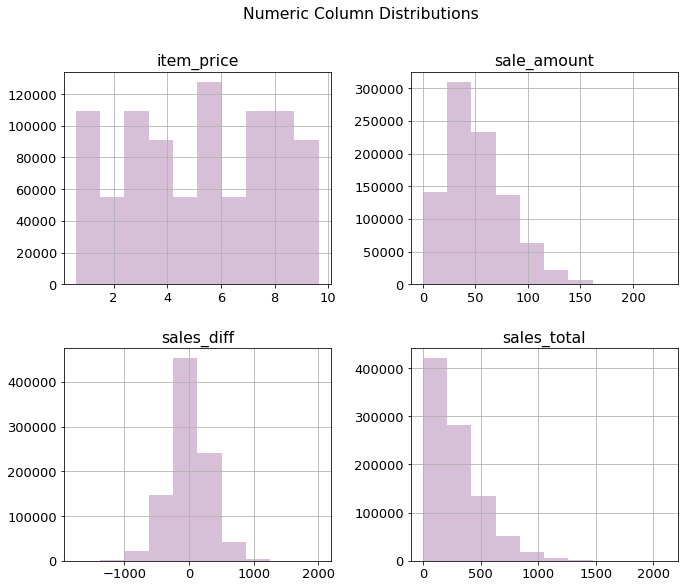

In [6]:
df = prepped_store_df()

In [8]:
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48


## Acuire OPS German Energy df

In [10]:
gdf = german_energy_csv()
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN


In [11]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


### 1-4 Prepare German Energy df

1. Convert date column to datetime format. <font color=red>(I already did this in acquire.)</font>


2. Plot the distribution of each of your variables. <font color=red>(Use function from above.)</font>



3. Set the index to be the datetime variable. <font color=red>(I already did this in acquire.)</font>



4. Add a month and a year column to your dataframe.

In [12]:
gdf['month'] = gdf.index.month.astype('category')
gdf['year'] = gdf.index.year.astype('category')

In [14]:
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


### 5. Build Function

In [15]:
def prepped_energy():
    """
    Function the acquires and returns 
    a prepared df for the OPS German Energy data
    and displays historgrams for numeric columns
    """
    # Acquire Datetime df
    gdf = german_energy_csv()
    
    # Create new date part columns as category dtypes
    gdf['month'] = gdf.index.month.astype('category')
    gdf['year'] = gdf.index.year.astype('category')
    
    # Plot numeric column distributions
    numeric_hists(gdf)
    
    return gdf

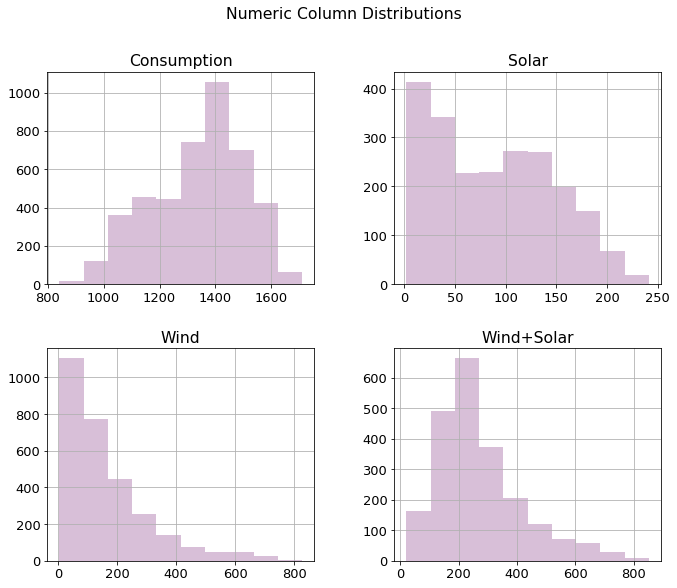

In [16]:
gdf = prepped_energy()

In [17]:
gdf.head(2)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006


In [18]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Consumption  4383 non-null   float64 
 1   Wind         2920 non-null   float64 
 2   Solar        2188 non-null   float64 
 3   Wind+Solar   2187 non-null   float64 
 4   month        4383 non-null   category
 5   year         4383 non-null   category
dtypes: category(2), float64(4)
memory usage: 180.6 KB


## Acquire San Francisco Temps DataFrame

In [25]:
from vega_datasets import data

sfdf = data.sf_temps()
sfdf.head(2)

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00


In [26]:
sfdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

In [27]:
# Convert sfdf to a DateTime Series df

sfdf['date'] = pd.to_datetime(sfdf.date)
sfdf = sfdf.set_index('date').sort_index()
sfdf.head(2)

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4


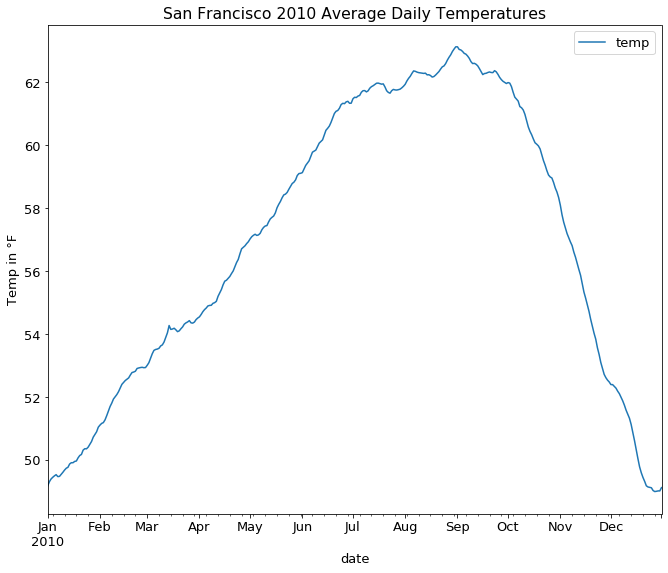

In [32]:
# resample by D and get average daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').mean().plot()

plt.title('San Francisco 2010 Average Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 2. Write the code necessary to visualize the minimum temperature over time.

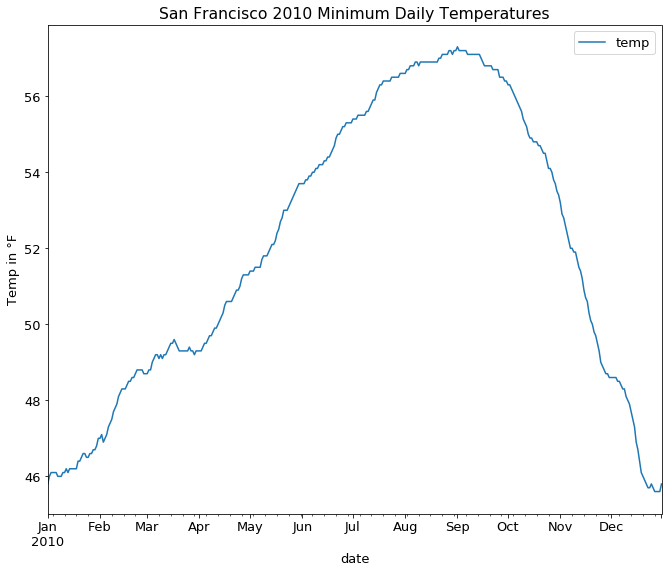

In [33]:
# resample by D and get minimum daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').min().plot()

plt.title('San Francisco 2010 Minimum Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 3. Write the code necessary to visualize the maximum temperature over time.


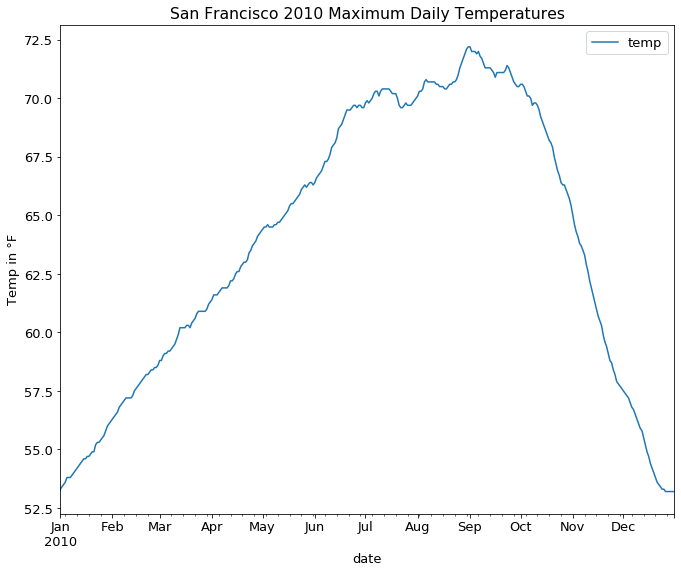

In [34]:
# resample by D and get maximum daily temp, (shift + option + 8 == degree symbol)

sfdf.resample('D').max().plot()

plt.title('San Francisco 2010 Maximum Daily Temperatures')
plt.ylabel('Temp in °F')
plt.show()

### 4. Which month is the coldest, on average?


In [59]:
# Here I wanted to see the coldest month and the temp, so I used .loc to pull up observation by index

sfdf.loc[sfdf.resample('M').mean().idxmin()]

,temp
date,
2010-01-31,49.4


### 5. Which month has the highest average temperature?


In [40]:
# Here I wanted to see the hotest month and the temp, so I used .loc to pull up observation by index

sfdf.loc[sfdf.resample('M').mean().idxmax()]

,temp
date,
2010-09-30,58.1


### 6. Resample by the day and calculate the min and max temp for the day. Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

- Hint: `.agg(['min', 'max'])`

In [75]:
# resample by day and get min and max temps in df
min_max = sfdf.resample('D').agg(['min', 'max'])

# take care of multi-index of df
min_max.columns = ['min_temp', 'max_temp']

# create temp_range column
min_max['temp_range'] = min_max.max_temp - min_max.min_temp

# return min, max, and max temp_range for month with highest range
min_max.loc[min_max.temp_range.idxmax()]

min_temp      57.2
max_temp      72.2
temp_range    15.0
Name: 2010-08-31 00:00:00, dtype: float64

### 7. Bonus: Visualize the daily min, average, and max temperature over time on a single line plot.

- i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [84]:
temp_agg = sfdf.resample('D').agg(['min', 'mean', 'max'])
temp_agg.columns = ['min_temp', 'mean_temp', 'max_temp']
temp_agg.head(2)

,min_temp,mean_temp,max_temp
date,,,
2010-01-01,45.8,49.170833,53.3
2010-01-02,46.0,49.304167,53.4


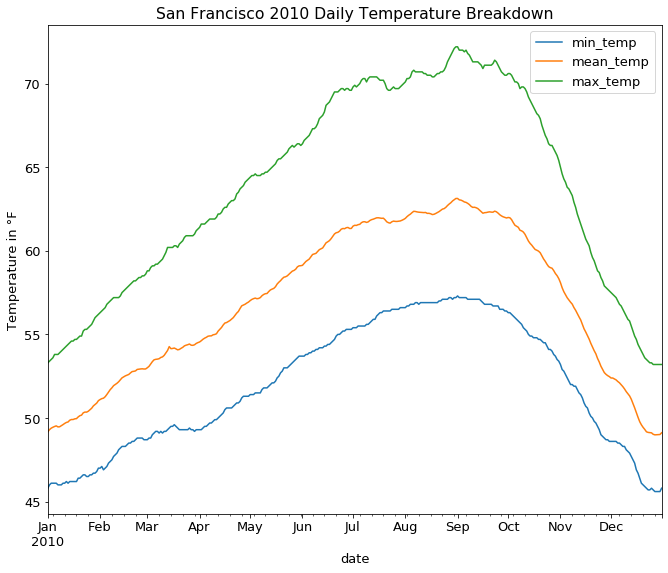

In [89]:
temp_agg.min_temp.plot()

temp_agg.mean_temp.plot()

temp_agg.max_temp.plot()

plt.legend()
plt.title('San Francisco 2010 Daily Temperature Breakdown')
plt.ylabel('Temperature in °F')
plt.show()